In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data1=pd.read_csv(r"C:\Users\AISHWARYA\Downloads\Dec2021.csv", encoding='latin-1')
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
KARNATAKA STATE ROAD TRANSPORT CORPORATION,DIVISIONWISE OPERATIONAL RESULTS FOR THE MONTH...,NaN,NaN,Sl.No.,NaN,1,NaN,2,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,Factor,Physical performance,Schedules,(As on last day),Fleet Held,(As on last day),Fleet Utilisation (%),...,MDY,CJR,HSN,CKM,MNG,PTR,DVG,SMG,CDG,KBS
Unnamed: 2,NaN,NaN,NaN,BNG©,NaN,589,NaN,743,NaN,69,...,Mandya,Chamarajanagar,Hassan,Chikkamagaluru,Mangaluru,Puttur,Davanagere,Shivamoga,Chitradurga,Kempegowda Bus Station is a Division with just...
Unnamed: 3,NaN,NaN,NaN,RMN,NaN,471,NaN,498,NaN,80.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,TMK,NaN,572,NaN,620,NaN,87.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held (As on last day)','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')

In [19]:
print(D1.columns)

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')


In [21]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')
D1['Fleet Utilisation (%)'] = pd.to_numeric(D1['Fleet Utilisation (%)'], errors='coerce')
D1['Schedules'] = pd.to_numeric(D1['Schedules'], errors='coerce')


FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Schedules']
EffPassDensity=np.multiply(FleetUtilisation, FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [22]:
D1.info

<bound method DataFrame.info of Unnamed: 1   Schedules  Fleet Utilisation (%) % off road  vehicles  \
Unnamed: 2         589                   69.0                  5.4   
Unnamed: 3         471                   80.2                  7.2   
Unnamed: 4         572                   87.3                  5.2   
Unnamed: 5         512                   87.8                  3.7   
Unnamed: 6         521                   91.0                  4.1   
Unnamed: 7         364                   79.7                  4.6   
Unnamed: 8         617                   79.6                  5.5   
Unnamed: 9         416                   83.7                  6.4   
Unnamed: 10        463                   87.8                  5.5   
Unnamed: 11        523                   90.6                  7.5   
Unnamed: 12        493                   93.5                    4   
Unnamed: 13        480                   81.1                  6.4   
Unnamed: 14        486                   85.7             

In [23]:
D1.head()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,589,69.0,5.4,63.9,69.84,1,406.410
Unnamed: 3,471,80.2,7.2,38.99,41.45,2,377.742
Unnamed: 4,572,87.3,5.2,59.89,56.68,3,499.356
Unnamed: 5,512,87.8,3.7,46.71,50.48,4,449.536
Unnamed: 6,521,91.0,4.1,52.52,56.07,5,474.110


In [24]:
D1.tail()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 14,486,85.7,5.6,47.46,46.15,13,416.502
Unnamed: 15,334,95.6,4.2,35.86,36.01,14,319.304
Unnamed: 16,321,84.4,3.8,33.13,34.25,15,270.924
Unnamed: 17,266,86.2,6,28.32,28.43,16,229.292
Unnamed: 19,7428,84.6,5.3,741.69,758.49,17,6284.088


In [25]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Unnamed: 2 to Unnamed: 19
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       17 non-null     int64  
 1   Fleet Utilisation (%)           17 non-null     float64
 2   % off road  vehicles            17 non-null     object 
 3   Schedule kms (in lakh)          17 non-null     object 
 4   Effective Kilometers (in lakh)  17 non-null     object 
 5   City_Id                         17 non-null     int64  
 6   EffPassDensity                  17 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


In [26]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,589,69.0,5.4,63.9,69.84,1,406.410
Unnamed: 3,471,80.2,7.2,38.99,41.45,2,377.742
Unnamed: 4,572,87.3,5.2,59.89,56.68,3,499.356
Unnamed: 5,512,87.8,3.7,46.71,50.48,4,449.536
Unnamed: 6,521,91.0,4.1,52.52,56.07,5,474.110
Unnamed: 7,364,79.7,4.6,22.49,21.99,6,290.108
Unnamed: 8,617,79.6,5.5,66.12,67.33,7,491.132
Unnamed: 9,416,83.7,6.4,39.24,40.88,8,348.192
Unnamed: 10,463,87.8,5.5,46.44,47.27,9,406.514
Unnamed: 11,523,90.6,7.5,53.68,53.58,10,473.838


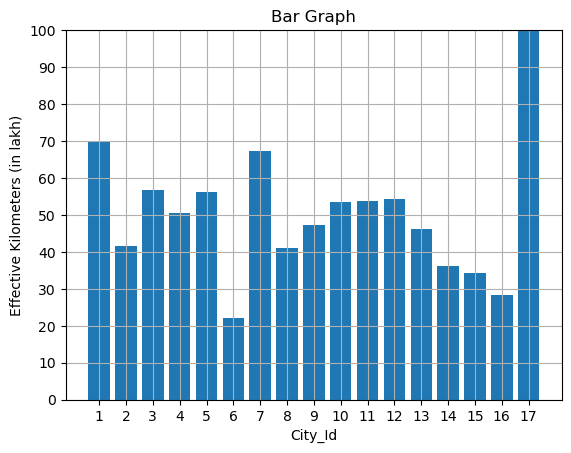

In [64]:
X=D1['City_Id']
Y=D1['Effective Kilometers (in lakh)']
plt.bar(X,Y)
plt.title("Bar Graph")
plt.xlabel('City_Id')
plt.ylabel('Effective Kilometers (in lakh)')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()

In [28]:
import scipy
print(scipy.__version__)

1.10.1


In [29]:
X=D1['City_Id']
Y=D1['Schedules']
'''
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Schedules')% of road vehicles
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()
'''

"\nplt.bar(X,Y)\nplt.xlabel('City ID')\nplt.ylabel('Schedules')% of road vehicles\nplt.xticks(X)  # Set x-axis ticks to match city IDs\n# Set y-axis range with a step of 10\nplt.ylim(0, 1000)  # Set the y-axis range from 0 to 100\nplt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10\nplt.grid(True)\nplt.show()\n"

In [30]:
D1


Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,589,69.0,5.4,63.9,69.84,1,406.410
Unnamed: 3,471,80.2,7.2,38.99,41.45,2,377.742
Unnamed: 4,572,87.3,5.2,59.89,56.68,3,499.356
Unnamed: 5,512,87.8,3.7,46.71,50.48,4,449.536
Unnamed: 6,521,91.0,4.1,52.52,56.07,5,474.110
Unnamed: 7,364,79.7,4.6,22.49,21.99,6,290.108
Unnamed: 8,617,79.6,5.5,66.12,67.33,7,491.132
Unnamed: 9,416,83.7,6.4,39.24,40.88,8,348.192
Unnamed: 10,463,87.8,5.5,46.44,47.27,9,406.514
Unnamed: 11,523,90.6,7.5,53.68,53.58,10,473.838


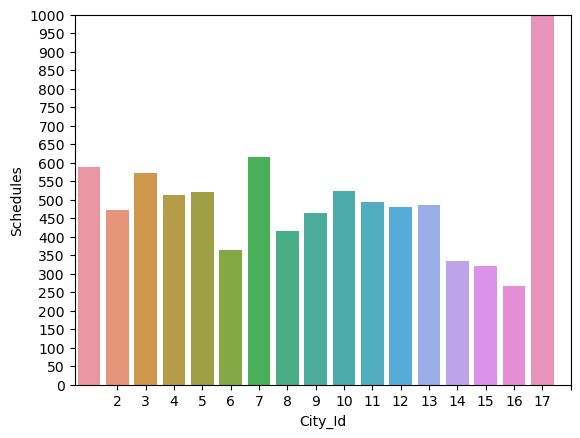

In [31]:
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

In [32]:
meanEPD=np.mean(D1['Schedules'])
print('Mean of Schedules:',meanEPD)

D1['Schedules'].values

Mean of Schedules: 873.8823529411765


array([ 589,  471,  572,  512,  521,  364,  617,  416,  463,  523,  493,
        480,  486,  334,  321,  266, 7428], dtype=int64)

In [33]:
std_by_city = D1['Schedules'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 2861965.9852941176
Standard deviation: 1691.7346084105857


In [34]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['Schedules'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'Schedules':D1['Schedules'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,Schedules,Mean Variations
0,1,589,-284.882353
1,2,471,-402.882353
2,3,572,-301.882353
3,4,512,-361.882353
4,5,521,-352.882353
5,6,364,-509.882353
6,7,617,-256.882353
7,8,416,-457.882353
8,9,463,-410.882353
9,10,523,-350.882353


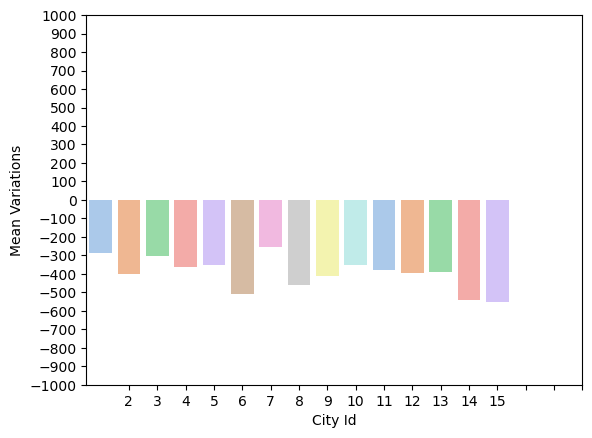

In [35]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_3788\1569367468.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: ylabel='Density'>

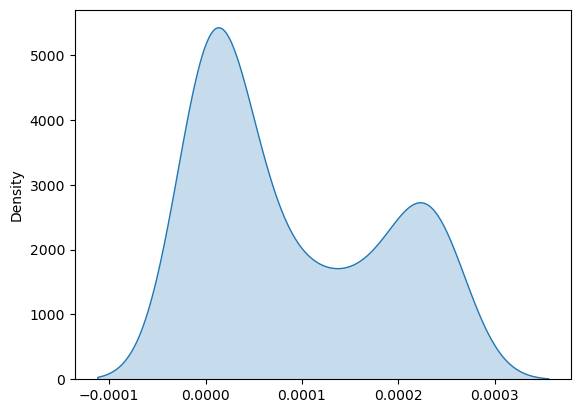

In [39]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['Schedules'])
sd = np.std(D1['Schedules'])
sorted_data = D1['Schedules'].sort_values()
X=np.linspace(D1['Schedules'].min(),D1['Schedules'].max(),100)
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_3788\2940990524.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=D1['Schedules'], shade=True)


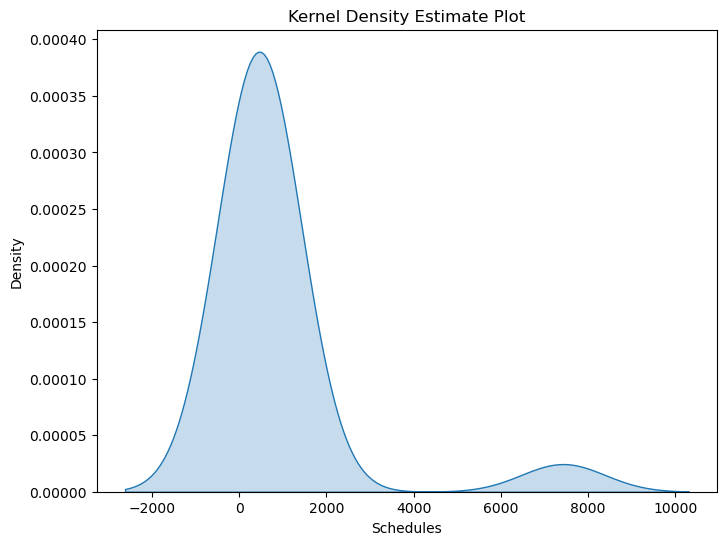

In [43]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['Schedules'])
sd = np.std(D1['Schedules'])

plt.figure(figsize=(8, 6))
sns.kdeplot(data=D1['Schedules'], shade=True)
plt.xlabel('Schedules')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot')
plt.show()

In [54]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,17.000000,17.000000,17,17,17,17.000000,17.000000
unique,NaN,NaN,15,17,17,NaN,NaN
top,NaN,NaN,5.5,63.9,69.84,NaN,NaN
freq,NaN,NaN,2,1,1,NaN,NaN
mean,873.882353,85.164706,NaN,NaN,NaN,9.000000,740.428412
std,1691.734608,6.265575,NaN,NaN,NaN,5.049752,1430.814159
min,266.000000,69.000000,NaN,NaN,NaN,1.000000,229.292000
25%,416.000000,81.100000,NaN,NaN,NaN,5.000000,348.192000
50%,486.000000,85.700000,NaN,NaN,NaN,9.000000,406.514000
75%,523.000000,87.800000,NaN,NaN,NaN,13.000000,473.838000


In [56]:
for col in D1.columns:
    D1[col] = pd.to_numeric(D1[col], errors='coerce')



In [57]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

# Display the updated Stats DataFrame
print(Stats)


Unnamed: 1    Schedules  Fleet Utilisation (%) % off road  vehicles  \
count         17.000000              17.000000                   17   
unique              NaN                    NaN                   15   
top                 NaN                    NaN                  5.5   
freq                NaN                    NaN                    2   
mean         873.882353              85.164706             5.317647   
std         1691.734608               6.265575             1.150671   
min          266.000000              69.000000                  3.7   
25%          416.000000              81.100000                  4.2   
50%          486.000000              85.700000                  5.4   
75%          523.000000              87.800000                  6.0   
max         7428.000000              95.600000                  7.5   

Unnamed: 1 Schedule kms (in lakh) Effective Kilometers (in lakh)    City_Id  \
count                          17                             17  17

<class 'numpy.int64'>


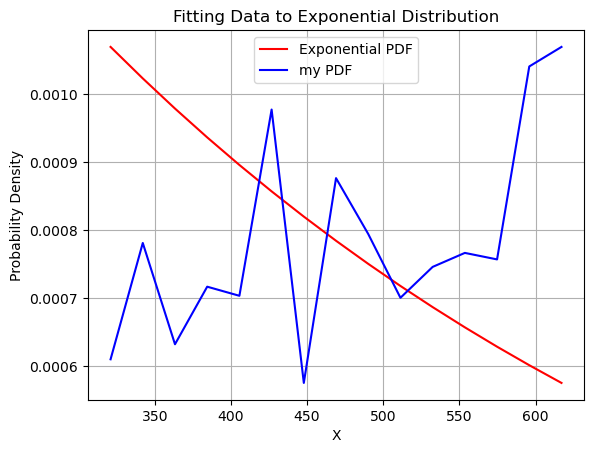

[0.00106926 0.00102294 0.00097863 0.00093624 0.00089569 0.00085689
 0.00081978 0.00078427 0.0007503  0.0007178  0.0006867  0.00065696
 0.0006285  0.00060128 0.00057524] [0.00060998 0.00078099 0.00063209 0.00071672 0.00070334 0.00097717
 0.00057524 0.00087634 0.00079418 0.0007004  0.00074582 0.0007664
 0.00075683 0.00104054 0.00106926]


In [58]:
from scipy.stats import expon

# Given data
data = D1['Schedules'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [59]:
#Left with:
'''
Correlation Analysis
Scatter Plot
Scatter heat map'''


'\nCorrelation Analysis\nScatter Plot\nScatter heat map'

In [60]:
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id',
       'EffPassDensity'],
      dtype='object', name='Unnamed: 1')

In [61]:
D1['Schedules'].values

array([ 589,  471,  572,  512,  521,  364,  617,  416,  463,  523,  493,
        480,  486,  334,  321,  266, 7428], dtype=int64)

In [62]:
Xfactor=D1['Schedules'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between Schedules & Effective Kilometers (in lakh):",R[0])

15 15
Coefficient of correlation between Schedules & Effective Kilometers (in lakh): 0.9098126006472815


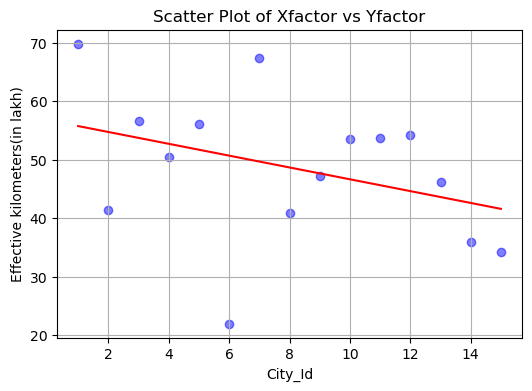

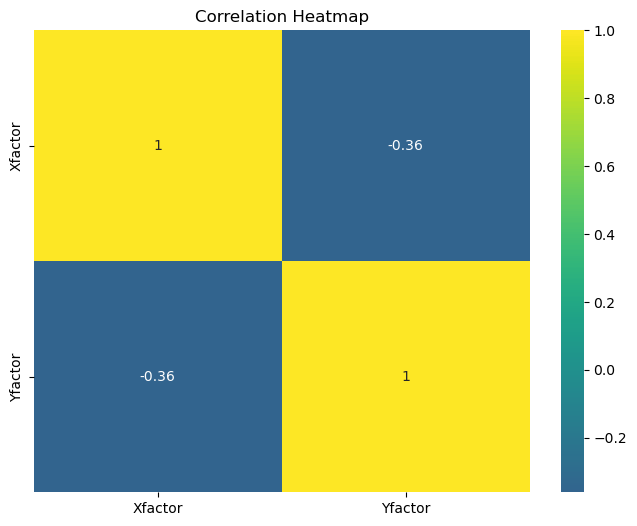

In [63]:
data = {
    'Xfactor': D1['City_Id'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('City_Id')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='viridis', center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()


